In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH',
    'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG', 'JD', 'LRCX', 'LSPD',
    'LULU', 'MA', 'MDB', 'MELI', 'MNST', 'MSFT', 'MTCH', 'NET', 'NVCR',
    'NVDA', 'ODFL', 'OKTA', 'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS',
    'PTON', 'PYPL', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD',
    'ROKU', 'RVLV', 'SBUX', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC',
    'TEAM', 'TREX', 'TSCO', 'TSLA', 'TTD', 'TTWO', 'TWLO', 'TWTR',
    'TYL', 'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AGI', 'AMRK', 'APT', 'BTTR', 'CENN', 'CTGO', 'CVE', 'DTST', 'EP',
    'FCUV', 'FKWL', 'FSI', 'GCBC', 'GGE', 'GME', 'HBM', 'INTZ', 'KREF',
    'LFMD', 'MCVT', 'MIY', 'MNMD', 'MOBQ', 'PACB', 'PETV', 'POWW',
    'PRPH', 'RFP', 'RVYL', 'SOBR', 'VIRT', 'WAVD', 'WKHS', 'ZEST',
    'ZYXI']
BEST_WEIGHTED = [
    'AMEH', 'BYRN', 'CEF', 'CGAU', 'CIZN', 'DYAI', 'FNV', 'HMY',
    'HNRG', 'IDR', 'IEI', 'MICS', 'MMU', 'MNP', 'MTA', 'MUE', 'NAN',
    'NPV', 'OMQS', 'RVP']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

81

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-11-19', datetime.date(2022, 11, 19))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  139 of 139 completed
Generating derived columns...
AAPL... ABMD... ABNB... ACN... ADBE... ADYEY... AGI... AMD... AMEH... AMGN... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BTTR... BYND... BYRN... CEF... CENN... CGAU... CHWY... CIZN... CRWD... CTGO... CVE... DDOG... DOCS... DOCU... DTST... DUOL... DYAI... EDIT... EP... ETSY... FCUV... FKWL... FLGT... FNV... FSI... GCBC... GGE... GH... GME... GMED... GOOG... HBM... HMY... HNRG... IDR... IDXX... IEI... INTG... INTZ... ISRG... JD... KREF... LFMD... LRCX... LSPD... LULU... MA... MCVT... MDB... MELI... MICS... MIY... MMU... MNMD... MNP... MNST... MOBQ... MSFT... MTA... MTCH... MUE... NAN... NET... NPV... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PAYC... PETV... PINS... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RFP... RGEN... RIVN... RMD... ROKU... RVLV... RVP... RVYL... SBUX... SE... SHOP... SNOW... SOBR... TASK... TDOC... TEAM... TREX.

In [5]:
data['Date'].tail()

2514   2022-11-14
2515   2022-11-15
2516   2022-11-16
2517   2022-11-17
2518   2022-11-18
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.000663
2       1.002320
3       1.013026
4       0.997970
5       0.994773
          ...   
2514    0.991064
2515    1.008713
2516    0.991748
2517    0.996911
2518    1.004759
Name: ^GSPC, Length: 2518, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.005228
2,1.009736
3,1.016282
4,1.003039
5,1.002936
...,...
2514,1.000485
2515,1.038969
2516,1.000000
2517,1.001899


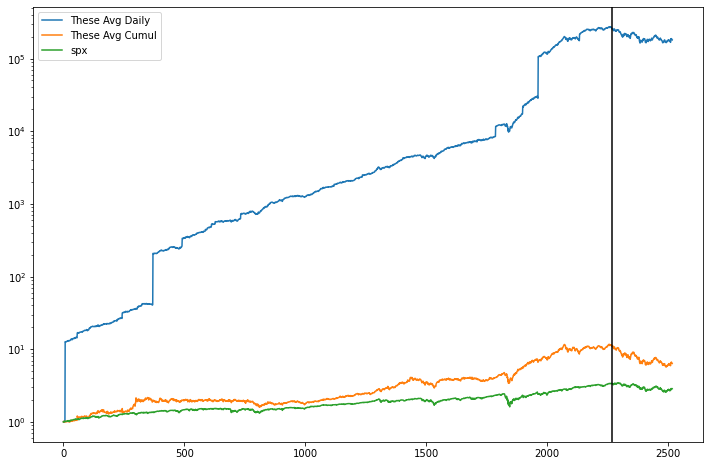

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-11-19,NaN,NaN
1,2012-11-20,1.004662,1.004662
2,2012-11-21,1.005003,1.003826
3,2012-11-23,1.020527,1.019986
4,2012-11-26,1.011218,1.012771


In [10]:
out.tail()

,Date,mine1,mine2
2514,2022-11-14,183807.359209,6.497621
2515,2022-11-15,187819.501525,6.639537
2516,2022-11-16,183453.538448,6.460133
2517,2022-11-17,180767.632030,6.390931
2518,2022-11-18,180064.163684,6.371327


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

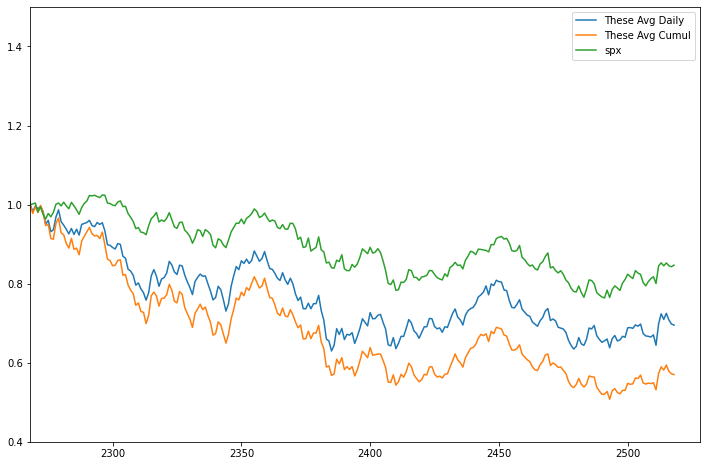

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2459,63.82,63.82,68.550003,62.919998,68.279999,4.156067,0.934681,0.945622,1.011705
2460,61.34,61.34,64.214996,61.330002,62.180000,4.116432,0.986491,0.961141,0.974303
2461,62.34,62.34,63.450001,60.520000,62.750000,4.132603,0.993466,1.016303,1.022987
2462,62.00,62.00,64.330002,61.200001,62.009998,4.127134,0.999839,0.994546,0.994706
2463,61.32,61.32,61.570000,58.646000,60.709999,4.116106,1.010048,0.989032,0.979194


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2459,63.82,63.82,68.550003,62.919998
2460,61.34,61.34,64.214996,61.330002
2461,62.34,62.34,63.450001,60.520000
2462,62.00,62.00,64.330002,61.200001
2463,61.32,61.32,61.570000,58.646000


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2459,63.82,63.82,68.550003,62.919998,64.214996,61.330002,1.006189,0.960984
2460,61.34,61.34,64.214996,61.330002,63.450001,60.520000,1.034398,0.986632
2461,62.34,62.34,63.450001,60.520000,64.330002,61.200001,1.031922,0.981713
2462,62.00,62.00,64.330002,61.200001,61.570000,58.646000,0.993065,0.945903
2463,61.32,61.32,61.570000,58.646000,61.889999,59.200001,1.009295,0.965427


0.05    0.972145
Name: HighMult, dtype: float64


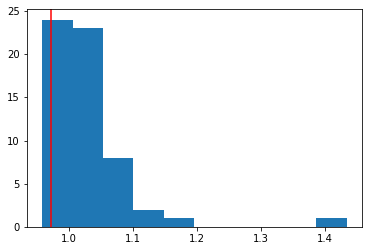

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0333289462294004


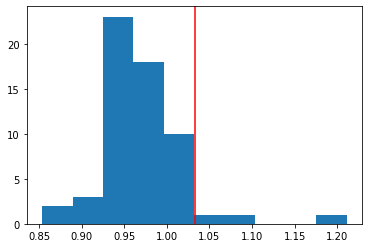

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0333289462294004, 0.9721450402691196)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0128013800734783, 0.9845593740180999)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2459,63.82,63.82,68.550003,62.919998,64.214996,61.330002,1.006189,0.960984,0
2460,61.34,61.34,64.214996,61.330002,63.450001,60.520000,1.034398,0.986632,0
2461,62.34,62.34,63.450001,60.520000,64.330002,61.200001,1.031922,0.981713,0
2462,62.00,62.00,64.330002,61.200001,61.570000,58.646000,0.993065,0.945903,0
2463,61.32,61.32,61.570000,58.646000,61.889999,59.200001,1.009295,0.965427,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(0.9951922626689179,
 0.9752578186311699,
 1.0419147888415343,
 0.9732756795097697)

In [27]:
get_hilo_mults(aapl)

(1.003785118326732, 0.9843931693360773, 1.0127537879566058, 0.9912998614785025)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=[
        'stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
        'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.003785,0.984393,1.012754,0.991300
1,ABMD,1.001382,0.996068,1.019540,0.994843
2,ABNB,0.999669,0.989024,1.024690,0.979348
3,ACN,1.003418,0.986457,1.011974,0.995133
4,ADBE,1.012951,0.995443,1.009005,0.978338


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,151.289993,AAPL
ABMD,377.290009,ABMD
ABNB,97.769997,ABNB
ACN,286.5,ACN
ADBE,330.859985,ADBE
...,...,...
ZM,81.639999,ZM
ZYXI,13.85,ZYXI
^GSPC,3965.340088,^GSPC
^IXIC,11146.0625,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.003785,0.984393,1.012754,0.991300,151.289993
1,ABMD,1.001382,0.996068,1.019540,0.994843,377.290009
2,ABNB,0.999669,0.989024,1.024690,0.979348,97.769997
3,ACN,1.003418,0.986457,1.011974,0.995133,286.5
4,ADBE,1.012951,0.995443,1.009005,0.978338,330.859985


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv